In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
lmbd = 10

In [46]:
instants = [1e3, 1e4, 1e6]
runs = 70

nt_hist = []

for run in range(runs):
    print("Run", run+1, "ongoing...")
    nt_list = []
    t = np.random.exponential(scale = 1/lmbd, size = int(2e7))
    call_starts = np.cumsum(t)
    call_duration = np.exp(np.random.normal(loc = 4, scale = 1, size = len(call_starts)))
    calls = np.array(list(zip(call_starts, call_starts+call_duration)))
    for instant in instants:
        greater_than_instant = calls > instant
        no_of_calls_at_instant = np.count_nonzero(np.bitwise_xor(greater_than_instant[:,0], greater_than_instant[:,1]))
        nt_list.append(no_of_calls_at_instant)
    nt_hist.append(nt_list)
print("Done.")

Run 1 ongoing...
Run 2 ongoing...
Run 3 ongoing...
Run 4 ongoing...
Run 5 ongoing...
Run 6 ongoing...
Run 7 ongoing...
Run 8 ongoing...
Run 9 ongoing...
Run 10 ongoing...
Run 11 ongoing...
Run 12 ongoing...
Run 13 ongoing...
Run 14 ongoing...
Run 15 ongoing...
Run 16 ongoing...
Run 17 ongoing...
Run 18 ongoing...
Run 19 ongoing...
Run 20 ongoing...
Run 21 ongoing...
Run 22 ongoing...
Run 23 ongoing...
Run 24 ongoing...
Run 25 ongoing...
Run 26 ongoing...
Run 27 ongoing...
Run 28 ongoing...
Run 29 ongoing...
Run 30 ongoing...
Run 31 ongoing...
Run 32 ongoing...
Run 33 ongoing...
Run 34 ongoing...
Run 35 ongoing...
Run 36 ongoing...
Run 37 ongoing...
Run 38 ongoing...
Run 39 ongoing...
Run 40 ongoing...
Run 41 ongoing...
Run 42 ongoing...
Run 43 ongoing...
Run 44 ongoing...
Run 45 ongoing...
Run 46 ongoing...
Run 47 ongoing...
Run 48 ongoing...
Run 49 ongoing...
Run 50 ongoing...
Run 51 ongoing...
Run 52 ongoing...
Run 53 ongoing...
Run 54 ongoing...
Run 55 ongoing...
Run 56 ongoing...
R

In [47]:
nt_hist = list(zip(*nt_hist))

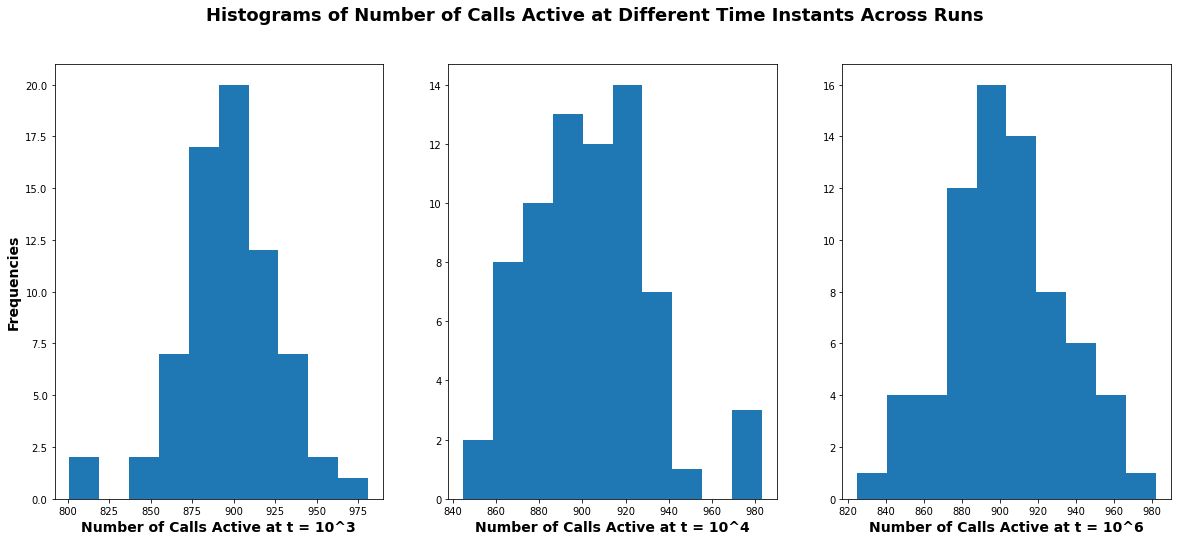

In [50]:
mean_list = []
fig, ax = plt.subplots(1, 3, figsize = (20, 8))
ax[0].set_ylabel("Frequencies", fontweight = 'bold', fontsize = 14)
for i in range(len(instants)):
    ax[i].hist(nt_hist[i])
    ax[i].set_xlabel(f"Number of Calls Active at t = 10^{int(np.log10(instants[i]))}",  fontweight = 'bold', fontsize = 14)
    mean_list.append(np.mean(nt_hist[i]))
fig.suptitle("Histograms of Number of Calls Active at Different Time Instants Across Runs", fontweight = 'bold', fontsize = 18)
plt.show()

In [51]:
from tabulate import tabulate

df = pd.DataFrame(mean_list, index = ['t = 10^3', 't = 10^4', 't = 10^6'], columns = ['Empirical Means'])
print(tabulate(df, headers='keys', tablefmt='psql'))

+----------+-------------------+
|          |   Empirical Means |
|----------+-------------------|
| t = 10^3 |           896.457 |
| t = 10^4 |           903.414 |
| t = 10^6 |           903.186 |
+----------+-------------------+


**Inferences:**

* The empirical mean is approximately equal to 900 for each value of $t$. We can say that the mean number of calls active at any given time remains roughly constant.
* The mean of active calls at a given instant can be roughly verified by considering the expectation of the number of arrivals of the Poisson Process $(\lambda t)$ where we consider $t$ to be the average call duration. This is an equivalent situation.
* The average call duration is the expected value of the given log-normal distribution $\mu_{duration}= e^{\mu + \frac{\sigma^2}{2}} = e^{4 + \frac{1^2}{2}} = 90.017$.
* Therefore, the expectation of number of arrivals in a Poisson Process until $t = \mu_{duration}$ is equal to $\lambda\mu_{duration} = 900.17$, which is in accordance with our empirical means! <br/><br/>
* The histogram of $N(t)$ is roughly Gaussian (after normalization) from visual inspection, owing to the Central Limit Theorem which states that the sum of a large number of independent random variables is approximately Gaussian. Here, each of the independent random variables is $N_i(t)$, the number of calls at time $t$ in run $i$.
* The normalized histogram of $N(t)$ will start looking more and more like a Gaussian as we increase the number of runs. Also, the empirical/sample mean of $N(t)$ will converge to the actual mean (Law of Large Numbers).